In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model, Sequential
import cv2
import time
from PIL import Image

In [3]:
X_array = np.array([[[[]]]])

y_array = []
subdirs = [x[0] for x in os.walk('.', topdown= True)]
subdirs = subdirs[1:]
print(subdirs)

['.\\Butterfly', '.\\Cat', '.\\Chicken', '.\\Cow', '.\\Dogs', '.\\Elephant', '.\\Horse', '.\\Sheep', '.\\Spider', '.\\Squirrel', '.\\weights_folder']


In [3]:
for i in range(len(subdirs)):
    a = time.time()
    m = os.listdir(subdirs[i])
    print(i,len(m))
    for j in range(len(m)):
        try:
            image = cv2.imread(os.getcwd()+subdirs[i][1:]+ str('\\')+ m[j]) #for windows
            # image = cv2.imread(os.getcwd()+subdirs[i][1:]+ str('/')+ m[j]) #for MAC
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if (image.shape == (300,300, 3)):
                image = np.expand_dims(image, axis = 0)
                if (i == 0 and j == 0):
                    X_array = image
                    y_array.append(i)
                else:
                    X_array = np.concatenate((X_array, image), axis = 0)
                    y_array.append(i)
        except OSError:
            print(i, j)
    print(time.time() - a)
print(X_array.shape)

0 1000
29.24915909767151
1 1000
87.08449578285217
2 1000
135.52572512626648
3 1000
198.38461208343506
4 1000
192.4037058353424
5 1000
243.97760009765625
6 1000
340.62686800956726
7 1000
436.4600489139557
8 1000
499.69350504875183
9 1000
625.6731069087982
(10000, 300, 300, 3)


In [4]:
y_array = np.array(y_array)
print(y_array)
print(len(y_array))

print(len(set(y_array)))

print(set(y_array))

[0 0 0 ... 9 9 9]
10000
10
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 
X_array, y_array = shuffle(X_array, y_array)
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.4, shuffle = True)

In [18]:
K = len(set(y_train))

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, padding = 'valid', activation = 'relu')(i)
x = MaxPool2D(pool_size= (3,3), strides = (1,1))(x)
x = Conv2D(64, (3,3), strides = 2, padding = 'valid', activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, padding = 'valid', activation = 'relu')(x)
x = Conv2D(256, (3,3), strides = 2, padding = 'valid', activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 149, 149, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 147, 147, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 73, 73, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 36, 36, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 17, 17, 256)       295168    
                                                           

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 30, batch_size = 100)

model.save_weights("weights_folder/weights")

Epoch 1/30
60/60 [==============================] - 125s 2s/step - loss: 15.8440 - accuracy: 0.1417 - val_loss: 2.2727 - val_accuracy: 0.2000
Epoch 2/30
60/60 [==============================] - 128s 2s/step - loss: 2.1042 - accuracy: 0.2580 - val_loss: 2.1485 - val_accuracy: 0.2368
Epoch 3/30
60/60 [==============================] - 128s 2s/step - loss: 1.8421 - accuracy: 0.3727 - val_loss: 2.1441 - val_accuracy: 0.2558
Epoch 4/30
60/60 [==============================] - 130s 2s/step - loss: 1.4574 - accuracy: 0.5143 - val_loss: 2.2323 - val_accuracy: 0.2848
Epoch 5/30
60/60 [==============================] - 137s 2s/step - loss: 1.0883 - accuracy: 0.6397 - val_loss: 2.3651 - val_accuracy: 0.2982
Epoch 6/30
60/60 [==============================] - 137s 2s/step - loss: 0.7913 - accuracy: 0.7517 - val_loss: 2.7323 - val_accuracy: 0.2930
Epoch 7/30
60/60 [==============================] - 135s 2s/step - loss: 0.6431 - accuracy: 0.8083 - val_loss: 2.6796 - val_accuracy: 0.2865
Epoch 8/30
6

In [20]:
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
y_pred = model.predict(X_test)
y_pred = [list(val) for val in y_pred]
y_pred = [val.index(max(val)) for val in y_pred]
y_pred = np.array(y_pred)
print(y_pred.shape, y_test.shape)

(4000,) (4000,)


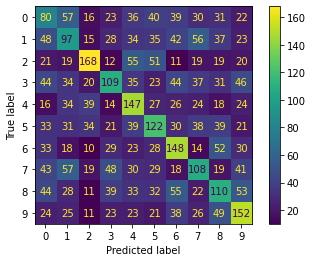

In [22]:
conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [23]:
x_check = np.expand_dims(X_test[700], axis = 0)
print(x_check.shape)
y_true_label = y_test[700]
prediction = model.predict(x_check)
prediction = [list(prediction[0])]
prediction = prediction[0].index(max(prediction[0]))
print(prediction)

(1, 300, 300, 3)
5


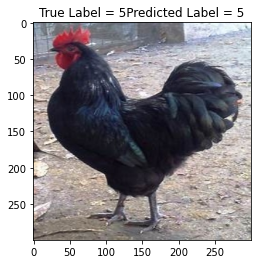

In [24]:
plt.imshow(X_test[700], cmap = 'gray')
plt.title("True Label = "+ str(y_true_label) + "Predicted Label = " + str(prediction))
plt.show()

## Loading Model for Demo Results

In [4]:
K=10
i = Input(shape = (300,300,3))
x = Conv2D(32, (3,3), strides = 2, padding = 'valid', activation = 'relu')(i)
x = MaxPool2D(pool_size= (3,3), strides = (1,1))(x)
x = Conv2D(64, (3,3), strides = 2, padding = 'valid', activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, padding = 'valid', activation = 'relu')(x)
x = Conv2D(256, (3,3), strides = 2, padding = 'valid', activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 149, 149, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 147, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 256)       295168    
                                                             

In [5]:
model.load_weights(filepath="weights_folder\\weights")

1/1 [==============================] - 0s 284ms/step
1


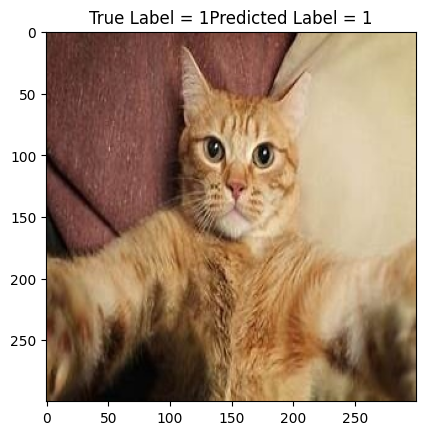

In [6]:
m = os.listdir(subdirs[1])
image = cv2.imread(os.getcwd()+subdirs[1][1:]+ str('\\')+ m[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
if (image.shape == (300,300, 3)):
    image = np.expand_dims(image, axis = 0)
prediction = model.predict(image)
prediction = [list(prediction[0])]
prediction = prediction[0].index(max(prediction[0]))
print(prediction)
plt.imshow(image[0], cmap = 'gray')
plt.title("True Label = "+ str(1) + "Predicted Label = " + str(prediction))
plt.show()

1/1 [==============================] - 0s 46ms/step
5


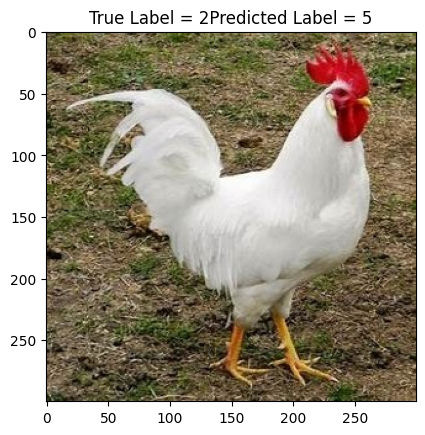

In [7]:
m = os.listdir(subdirs[2])
image = cv2.imread(os.getcwd()+subdirs[2][1:]+ str('\\')+ m[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
if (image.shape == (300,300, 3)):
    image = np.expand_dims(image, axis = 0)
prediction = model.predict(image)
prediction = [list(prediction[0])]
prediction = prediction[0].index(max(prediction[0]))
print(prediction)
plt.imshow(image[0], cmap = 'gray')
plt.title("True Label = "+ str(2) + "Predicted Label = " + str(prediction))
plt.show()

1/1 [==============================] - 0s 25ms/step
9


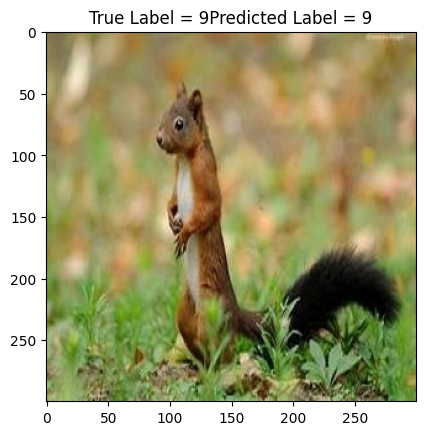

In [8]:
m = os.listdir(subdirs[9])
image = cv2.imread(os.getcwd()+subdirs[9][1:]+ str('\\')+ m[190])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
if (image.shape == (300,300, 3)):
    image = np.expand_dims(image, axis = 0)
prediction = model.predict(image)
prediction = [list(prediction[0])]
prediction = prediction[0].index(max(prediction[0]))
print(prediction)
plt.imshow(image[0], cmap = 'gray')
plt.title("True Label = "+ str(9) + "Predicted Label = " + str(prediction))
plt.show()

1/1 [==============================] - 0s 54ms/step
6


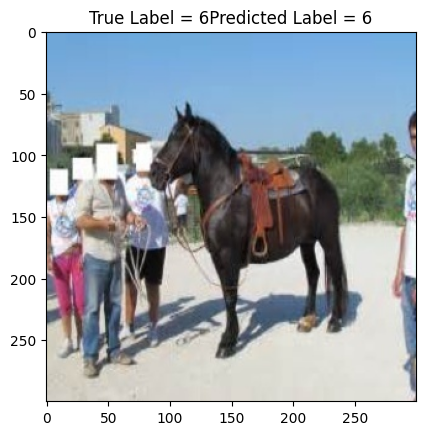

In [9]:
m = os.listdir(subdirs[6])
image = cv2.imread(os.getcwd()+subdirs[6][1:]+ str('\\')+ m[999])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
if (image.shape == (300,300, 3)):
    image = np.expand_dims(image, axis = 0)
prediction = model.predict(image)
prediction = [list(prediction[0])]
prediction = prediction[0].index(max(prediction[0]))
print(prediction)
plt.imshow(image[0], cmap = 'gray')
plt.title("True Label = "+ str(6) + "Predicted Label = " + str(prediction))
plt.show()

# Completed By
### Anuj Gupta (21d070014)
### Aryan Mishra (210020023)
### Atharva Kulkarni (210070047)
### Ravi Kumar (210010052)